In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# Importation des données

data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.shape

(99999, 226)

In [6]:
data.isnull().values.sum()

3594931

In [7]:
# Estimateurs statistiques simples
    # Moyennes, écarts-types, minimum, maximum, quartiles...
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [8]:
data.isna().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [9]:
#Let's display categoricals variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print(categorical)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


Toutes les variables catégorielles sont des dates

In [10]:
data[categorical].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [11]:
# Missing Data in categorical variables
data[categorical].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [12]:
#Let's display numericals variables
numerical = [var for var in data.columns if data[var].dtype != 'O']
print(numerical)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

In [13]:
data[numerical].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [14]:
# Missing Data in categorical variables
data[categorical].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [15]:
lst_av_rech = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
data[lst_av_rech].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,NaN
1,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN


In [16]:
for col in numerical:
        col_median = data[col].median()
        data[col].fillna(col_median, inplace=True)

In [17]:
data[lst_av_rech].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,164.0
1,154.0,154.0,50.0,164.0
2,154.0,154.0,154.0,46.0
3,154.0,154.0,154.0,164.0
4,56.0,154.0,154.0,164.0


In [18]:
# Checking Missing Data in numerical variables
data[numerical].isnull().sum()

mobile_number     0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
sep_vbc_3g        0
Length: 214, dtype: int64

In [19]:
data[numerical].isnull().values.sum()

0

In [20]:
data['amt_rech_67'] = data['total_rech_amt_6'] + data['total_rech_amt_7']+ data['av_rech_amt_data_6']+ data['av_rech_amt_data_7']
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1118.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,1.0,1.0,1.0,1.0,1006,0.0,0.0,0.00,0.00,766.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,1.0,1.0,1.0,1.0,1103,0.0,0.0,4.17,0.00,791.0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,1.0,1.0,1.0,1.0,2491,0.0,0.0,0.00,0.00,848.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,1.0,1.0,1.0,1526,0.0,0.0,0.00,0.00,756.0


In [21]:
data['amt_rech_67'].tail()

99994     478.0
99995     528.0
99996     312.0
99997    1680.0
99998    1018.0
Name: amt_rech_67, dtype: float64

Fonction pour le calcul des centiles

In [22]:
import math
import functools

def percentile(dt, perc: int):
    size = len(dt)
    return sorted(dt)[int(math.ceil((size * perc) / 100)) - 1]

In [23]:
print(percentile(data['amt_rech_67'], 70))

1062.0


L'on ne peut obtenir environ 29900 abonnés que si nous sélectionnons les montants de consommation strictement supérieurs à 1062. En incluant ce montant, dans le critère de sélection nous obtenons 30010 abonnés.

In [24]:
df_perc_70 = data.loc[data['amt_rech_67'] > 1062.0, :]
df_perc_70.shape

(29960, 227)

Visualisons les données qui serviront au marquage des abonnés. Elles eprmettront de dire si oui ou non un abonné s'est désabonné.

In [25]:
df_perc_70[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0


Marquons les abonnés avec aperçu des données

In [26]:
df_perc_70['Churn'] = np.where(((df_perc_70['total_ic_mou_9'] == 0) | (df_perc_70['total_og_mou_9'] == 0)) & ((df_perc_70['vol_2g_mb_9'] == 0) | (df_perc_70['vol_3g_mb_9'] == 0)), 1, 0)
df_perc_70.head()

/tmp/ipykernel_82560/521298931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perc_70['Churn'] = np.where(((df_perc_70['total_ic_mou_9'] == 0) | (df_perc_70['total_og_mou_9'] == 0)) & ((df_perc_70['vol_2g_mb_9'] == 0) | (df_perc_70['vol_3g_mb_9'] == 0)), 1, 0)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [27]:
#Let's display numericals variables
df_numeric = [var for var in df_perc_70.columns if df_perc_70[var].dtype != 'O']
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

In [28]:
df_perc_70[df_numeric].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [29]:
df_num = df_perc_70[df_numeric]
df_num.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,1.0,1.0,1.0,667,0.00,0.00,0.00,0.00,1124.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,1.0,1.0,1.0,720,0.00,0.00,0.00,0.00,1588.0,0
24,7001125315,109,0.0,0.0,0.0,422.050,359.730,354.793,473.030,124.19,...,1.0,1.0,1.0,3072,0.00,0.00,0.00,0.00,1078.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,...,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,7474.0,0
38,7000815202,109,0.0,0.0,0.0,363.987,486.558,393.909,391.709,248.99,...,1.0,1.0,0.0,1155,0.00,0.00,0.00,0.00,1364.0,0


In [30]:
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

Filtrons la liste des éléments de la liste "df_numeric" qui contient les libellés des colonnes du dataset

In [31]:
for col_9 in df_numeric:
    if col_9.endswith('_9'):
        df_numeric.remove(col_9)
        
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og

In [32]:
len(df_numeric)

165

In [33]:
df = df_perc_70[df_numeric]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,29960.0,7.001221e+09,685052.836748,7.000000e+09,7.000637e+09,7.001232e+09,7.001811e+09,7.002411e+09
circle_id,29960.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
jul_vbc_3g,29960.0,1.554759e+02,433.770996,0.000000e+00,0.000000e+00,0.000000e+00,3.909500e+01,9.165600e+03
jun_vbc_3g,29960.0,1.384498e+02,407.500179,0.000000e+00,0.000000e+00,0.000000e+00,1.538000e+01,1.116621e+04
sep_vbc_3g,29960.0,6.889262e+00,49.649472,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.618570e+03
amt_rech_67,29960.0,1.784888e+03,1071.155755,1.063000e+03,1.236000e+03,1.494000e+03,1.991250e+03,7.583300e+04


In [35]:
df.nunique()

mobile_number     29960
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
jul_vbc_3g         8127
jun_vbc_3g         7605
sep_vbc_3g         2283
amt_rech_67        3416
Churn                 2
Length: 165, dtype: int64

Sur la base de la fonction "nunique", les variables "mobile_number", "circle_id", "loc_og_t2o_mou", "std_og_t2o_mou" et "loc_ic_t2o_mou" ne nous semblent pas pertinentes pour l'analyse du phénomène de désabonnement des clients de l'entreprise de télécom.
la variable "CustomerID" renseigne qu'il existe autant de numéro de téléphone que d'abonnés dans ce jeu de données;
concernant les autres variables, leurs valeurs respectives sont des constantes et par conséquent, pas d'informations pertinentes.

In [36]:
df.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace = True)
df.head()

/tmp/ipykernel_82560/1016723695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace = True)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


Recherchons les variables qui pourraient avoir des constantes dans le jeu de données

In [37]:
const_columns = df.nunique()[df.nunique() == 1].keys().tolist()
const_columns

['std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [38]:
df[['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].head()

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace = True)
df.head()

/tmp/ipykernel_82560/2217009177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace = True)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [76]:
df[['total_ic_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'onnet_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'std_og_t2m_mou_8']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_ic_mou_8,29960.0,291.938119,360.588745,0.000,74.93000,189.4850,376.6825,6066.630
total_og_mou_8,29960.0,608.880504,690.647304,0.000,159.98500,417.4200,822.9650,14043.060
loc_ic_mou_8,29960.0,234.821524,304.794396,0.000,58.32000,139.6600,299.0125,5748.810
loc_og_mou_8,29960.0,257.381322,364.346462,0.000,43.74000,139.2800,340.6400,11039.910
total_rech_amt_8,29960.0,610.158478,604.499008,0.000,300.00000,516.0000,789.0000,45320.000
last_day_rch_amt_8,29960.0,96.840821,146.285719,0.000,0.00000,50.0000,130.0000,4449.000
loc_og_t2m_mou_8,29960.0,165.588122,234.010088,0.000,26.30500,84.6250,218.7425,4961.330
loc_ic_t2m_mou_8,29960.0,153.733026,214.750209,0.000,34.83750,87.1500,194.3825,5738.460
loc_og_t2t_mou_8,29960.0,84.976547,231.875435,0.000,6.86000,26.7300,82.1650,10752.560
arpu_8,29960.0,531.564841,494.243325,-945.808,282.22875,449.5395,670.4670,33543.624


In [77]:
df[['total_ic_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'arpu_8',
 'roam_og_mou_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'onnet_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'std_og_t2m_mou_8']].describe().T.to_csv("data_describe.csv")

In [41]:
y = pd.DataFrame(df['Churn'], columns= ['Churn'])
X = df.drop('Churn', axis = 1)

In [42]:
seed = 11
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.utils import resample

Vérification des proportions de classes dans la variable cible

MODELISATIONS

IIème PARTIE: MODELISATION AVEC DONNEES D'ORIGINE STANDARDISEES

In [44]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


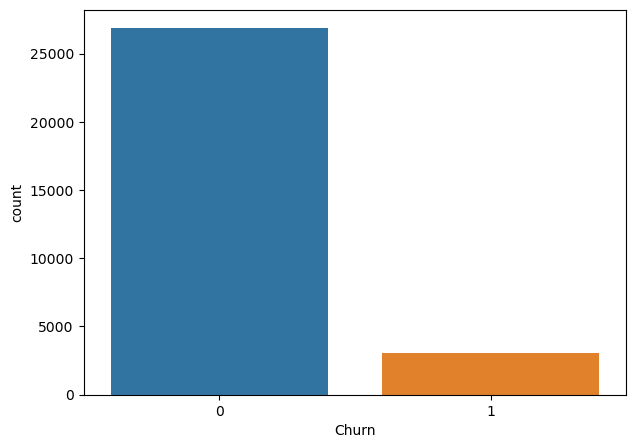

In [45]:
# Présentation de la proportion des churners par rapport aux abonnés fidèles
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="Churn");

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29960 entries, 0 to 99997
Columns: 154 entries, arpu_6 to Churn
dtypes: float64(128), int64(26)
memory usage: 35.4 MB


In [47]:
df.isnull().values.sum()

0

In [48]:
y_br = pd.DataFrame(df['Churn'], columns= ['Churn'])
X_br = df.drop(['Churn'], axis=1)

In [49]:
y_br.head()

,Churn
0,1
7,1
8,0
13,0
16,0


In [50]:
X_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,0,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,0,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0


In [51]:
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_br, y_br, test_size = 0.4, random_state = seed, stratify = y_br)

X_val_br, X_test_br, y_val_br, y_test_br = train_test_split(X_test_br, y_test_br, test_size = 0.5, random_state = seed, stratify = y_test_br)

In [52]:
pd.DataFrame(y_br).value_counts(normalize = True)

Churn
0        0.896929
1        0.103071
dtype: float64

In [53]:
pd.DataFrame(y_test_br).value_counts(normalize = True)

Churn
0        0.896862
1        0.103138
dtype: float64

In [54]:
pd.DataFrame(y_val_br).value_counts(normalize = True)

Churn
0        0.897029
1        0.102971
dtype: float64

In [55]:
# Sur échantillonnage
X_up_br = X_train_br

X_up_br['Churn'] = y_train_br.values

minority_br = X_up_br[X_up_br.Churn == 1]

majority_br = X_up_br[X_up_br.Churn == 0]

minority_upsampled_br = resample(minority_br, replace = True, n_samples = len(majority_br), random_state = seed)

upsampled_br = pd.concat([majority_br, minority_upsampled_br])

upsampled_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
37550,592.597,423.130,55.588,372.99,164.29,6.64,808.39,661.61,68.96,0.0,...,1.0,1.0,1.0,577,0.00,0.00,0.00,0.0,1532.0,0
95997,512.899,656.806,475.119,315.06,413.06,290.08,133.71,185.99,80.33,0.0,...,1.0,1.0,1.0,373,163.04,104.90,104.62,0.0,1504.0,0
46208,658.739,1282.450,0.000,0.00,0.00,32.36,29.24,0.00,92.14,0.0,...,1.0,1.0,1.0,452,63.87,1073.62,872.25,0.0,3572.0,0
61723,371.087,476.409,258.274,792.34,869.21,349.74,55.18,228.99,79.49,0.0,...,1.0,1.0,1.0,321,0.00,0.00,0.00,0.0,1300.0,0
38885,676.231,849.140,851.909,1339.79,1554.73,1880.26,362.64,282.44,82.91,7.0,...,1.0,1.0,1.0,370,0.00,0.00,0.00,0.0,2094.0,0


In [56]:
upsampled_br['Churn'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [57]:
# Spécifions les données sur échantillonnées
y_train_up_br = pd.DataFrame(upsampled_br['Churn'], columns= ['Churn'])
X_train_up_br = upsampled_br.drop('Churn', axis = 1)

In [58]:
upsampled_br.to_csv("data_to_streamlit.csv")

In [59]:
# Spécifions les données d'entrainement de base
y_train_br = pd.DataFrame(X_train_br['Churn'], columns= ['Churn'])
X_train_br = X_train_br.drop('Churn', axis = 1)

In [60]:
train_features_br = X_train_up_br
train_target_br = y_train_up_br

In [61]:
train_features_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
37550,592.597,423.130,55.588,372.99,164.29,6.64,808.39,661.61,68.96,0.0,...,0,1.0,1.0,1.0,577,0.00,0.00,0.00,0.0,1532.0
95997,512.899,656.806,475.119,315.06,413.06,290.08,133.71,185.99,80.33,0.0,...,0,1.0,1.0,1.0,373,163.04,104.90,104.62,0.0,1504.0
46208,658.739,1282.450,0.000,0.00,0.00,32.36,29.24,0.00,92.14,0.0,...,0,1.0,1.0,1.0,452,63.87,1073.62,872.25,0.0,3572.0
61723,371.087,476.409,258.274,792.34,869.21,349.74,55.18,228.99,79.49,0.0,...,0,1.0,1.0,1.0,321,0.00,0.00,0.00,0.0,1300.0
38885,676.231,849.140,851.909,1339.79,1554.73,1880.26,362.64,282.44,82.91,7.0,...,0,1.0,1.0,1.0,370,0.00,0.00,0.00,0.0,2094.0


NORMALISATION DES DONNÉES (Entre 0 et 1)

Comme observé sur la dataframe des variables indépendantes ci-dessus, il est nécessaire de normaliser les valeurs...

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaler  = scaler.fit(train_features_br)
train_features_br = data_scaler.transform(train_features_br)

X_val_br = data_scaler.transform(X_val_br)
X_test_br = data_scaler.transform(X_test_br)

# Transformons les tableaux Numpy obtenus en dataframe
train_features_br = pd.DataFrame(train_features_br, columns=X_train_up_br.columns)
X_val_br = pd.DataFrame(X_val_br, columns=X_train_up_br.columns)
X_test_br = pd.DataFrame(X_test_br, columns=X_train_up_br.columns)

In [63]:
# Vérification de la normalisation
train_features_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,0.095076,0.065586,0.029035,0.053200,0.020139,0.000949,0.120425,0.079555,0.004923,0.000000,...,0.0,1.0,1.0,1.0,0.095871,0.000000,0.000000,0.000000,0.0,0.006273
1,0.092418,0.071875,0.041199,0.044937,0.050634,0.041461,0.019919,0.022364,0.005735,0.000000,...,0.0,1.0,1.0,1.0,0.046607,0.012623,0.011445,0.013800,0.0,0.005898
2,0.097281,0.088711,0.027423,0.000000,0.000000,0.004625,0.004356,0.000000,0.006578,0.000000,...,0.0,1.0,1.0,1.0,0.065685,0.004945,0.117136,0.115054,0.0,0.033556
3,0.087690,0.067020,0.034912,0.113012,0.106550,0.049988,0.008220,0.027535,0.005675,0.000000,...,0.0,1.0,1.0,1.0,0.034050,0.000000,0.000000,0.000000,0.0,0.003170
4,0.097865,0.077050,0.052124,0.191095,0.190582,0.268746,0.054022,0.033962,0.005919,0.002679,...,0.0,1.0,1.0,1.0,0.045883,0.000000,0.000000,0.000000,0.0,0.013789


Avant la modélisation, sélectionnons les meilleures variables prédictrices pour notre problématique.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [65]:
rf_var = RandomForestClassifier()
rf_var.fit(train_features_br, train_target_br)

print(classification_report(y_val_br, rf_var.predict(X_val_br)))

/tmp/ipykernel_82560/100198167.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_var.fit(train_features_br, train_target_br)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5375
           1       0.71      0.53      0.61       617

    accuracy                           0.93      5992
   macro avg       0.83      0.75      0.78      5992
weighted avg       0.92      0.93      0.92      5992



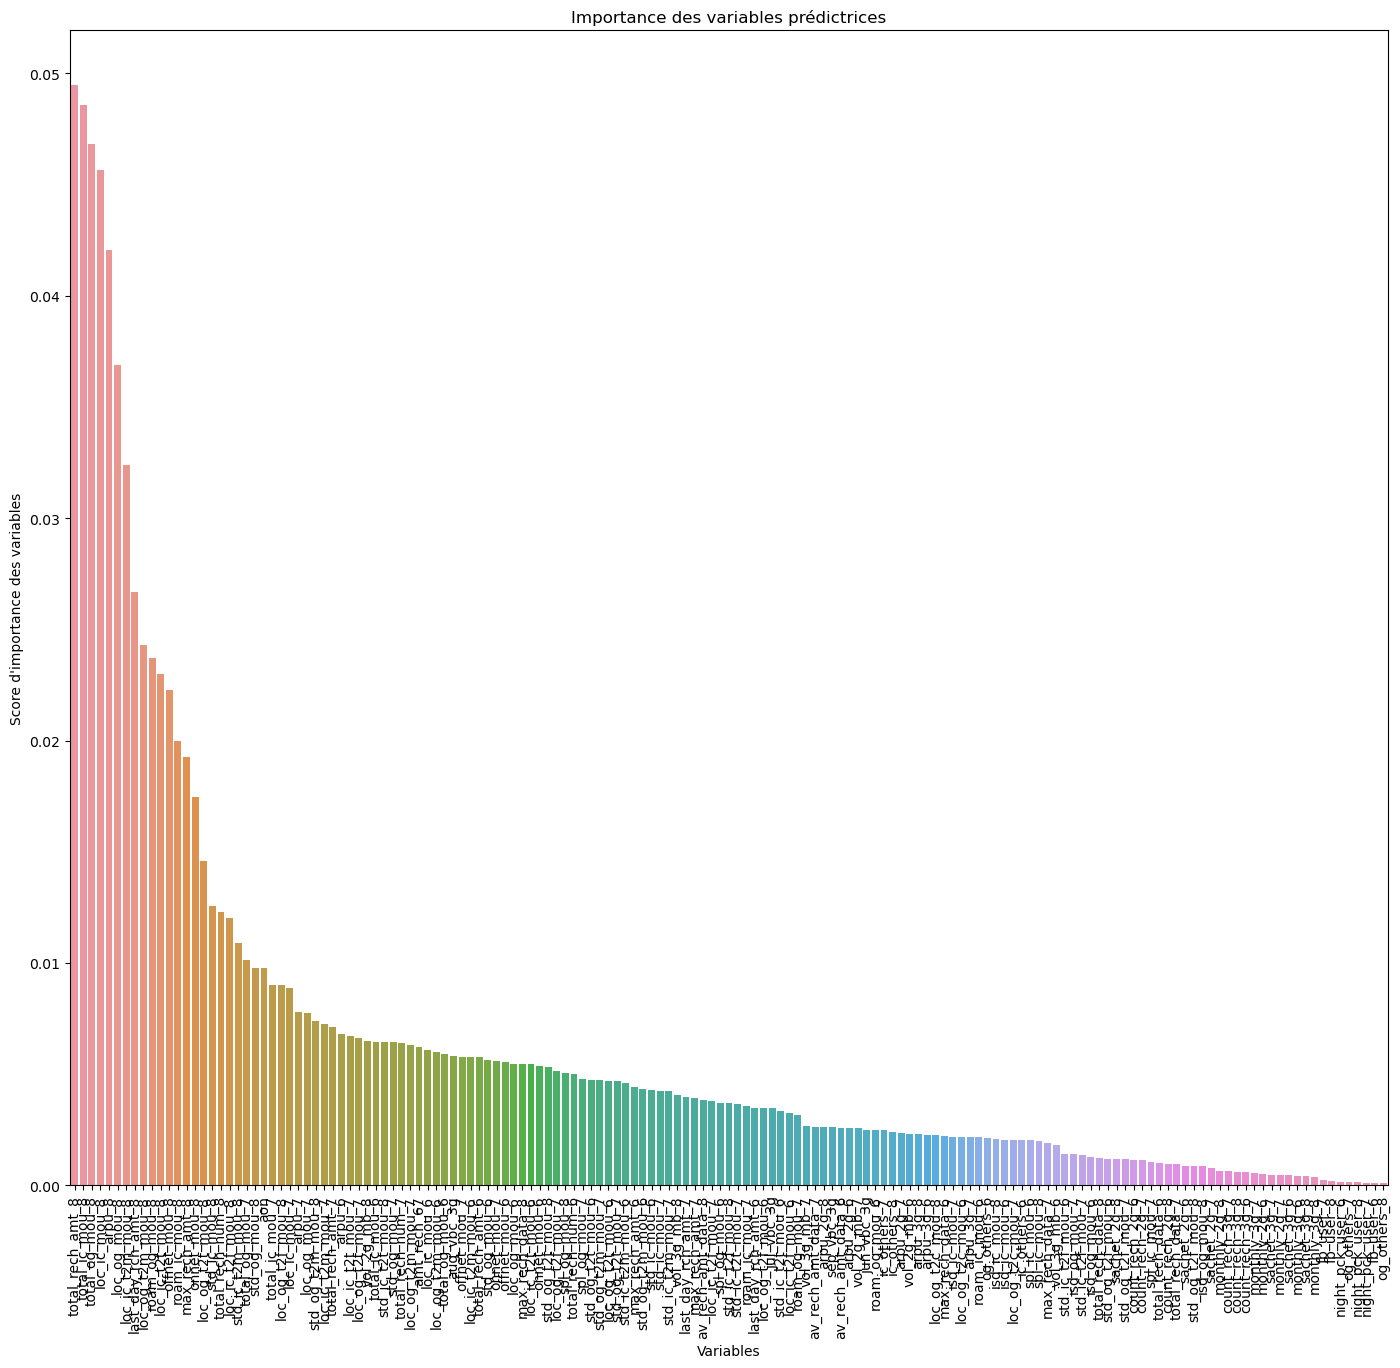

In [66]:
# Déterminons les variables ou les prédicteurs significatifs pour la détection des churners

plt.figure(figsize=(17,15))

churn_importance = pd.Series(rf_var.feature_importances_, index = train_features_br.columns).sort_values(ascending=False)

sns.barplot(x = churn_importance.index, y = churn_importance)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance des variables")
plt.title("Importance des variables prédictrices")
plt.show()

In [67]:
# Affichage des variables avec leur importance dans le jeu de données
churn_importance

total_rech_amt_8    0.049464
total_ic_mou_8      0.048594
total_og_mou_8      0.046841
loc_ic_mou_8        0.045655
arpu_8              0.042045
                      ...   
og_others_7         0.000161
night_pck_user_8    0.000131
night_pck_user_7    0.000108
fb_user_6           0.000107
og_others_8         0.000088
Length: 153, dtype: float64

In [68]:
seuil = 0.0099
churn_var_selected = churn_importance[churn_importance > seuil].index.to_list()

train_features_br = train_features_br[churn_var_selected]
X_val_br = X_val_br[churn_var_selected]
X_test_br = X_test_br[churn_var_selected]

# Nombre de variables obtenues
len(churn_var_selected)

21

In [69]:
churn_var_selected

['total_rech_amt_8',
 'total_ic_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'arpu_8',
 'loc_og_mou_8',
 'loc_ic_t2m_mou_8',
 'last_day_rch_amt_8',
 'loc_og_t2m_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'max_rech_amt_8',
 'onnet_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_mou_8',
 'total_rech_num_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'total_og_mou_7']

In [70]:
train_features_br.describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_amt_8,32246.0,0.010015,0.012711,0.0,0.000905,0.007899,0.014342,1.0
total_ic_mou_8,32246.0,0.031734,0.051681,0.0,0.000000,0.014145,0.042022,1.0
total_og_mou_8,32246.0,0.030843,0.044602,0.0,0.000000,0.015426,0.043756,1.0
loc_ic_mou_8,32246.0,0.028485,0.044763,0.0,0.003684,0.016322,0.033464,1.0
arpu_8,32246.0,0.039085,0.013727,0.0,0.029963,0.036979,0.043695,1.0
loc_og_mou_8,32246.0,0.031471,0.053950,0.0,0.002314,0.011516,0.037726,1.0
loc_ic_t2m_mou_8,32246.0,0.018602,0.031771,0.0,0.002070,0.010149,0.021622,1.0
last_day_rch_amt_8,32246.0,0.021393,0.042880,0.0,0.000000,0.005884,0.038247,1.0
loc_og_t2m_mou_8,32246.0,0.022842,0.041765,0.0,0.001409,0.008135,0.026017,1.0
roam_og_mou_8,32246.0,0.005868,0.028064,0.0,0.000000,0.000000,0.000614,1.0


In [71]:
# RF
rf = RandomForestClassifier()

# Entrainement du modèle
rf_model = rf.fit(train_features_br, train_target_br)

/tmp/ipykernel_82560/2209150631.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(train_features_br, train_target_br)


In [72]:
train_features_br.shape

(32246, 21)

In [73]:
# Concevons une fonction d'évaluation du modèle

def model_evaluation(model, features, target):
    pred = model.predict(features)
    print(classification_report(target, pred))

In [74]:
# Evaluation du modèle de Random Forest
model_evaluation(rf_model, X_val_br, y_val_br)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5375
           1       0.66      0.53      0.59       617

    accuracy                           0.92      5992
   macro avg       0.80      0.75      0.77      5992
weighted avg       0.92      0.92      0.92      5992



In [75]:
import joblib
joblib.dump(rf, "rf_streamlit.joblib")

['rf_streamlit.joblib']

In [ ]:
df.